In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from preprocessing import PreProcess
from overview import Overview
from plot import Plot

In [4]:
db = pd.read_csv('../data/cleaned_data.csv', na_values=['?', None])
db.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Total UL (Bytes),Total DL (Bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,36749741.0,308879636.0,1.570185e-12,0.000003,3.701304e-06,0.000018,0.000018,292.426453,180.558843,345.629377
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,53800391.0,653384965.0,1.933278e-12,0.000004,9.373850e-07,0.000039,0.000036,609.920783,541.959383,707.185356
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,27883638.0,279807335.0,1.726277e-12,0.000010,3.363124e-06,0.000034,0.000024,229.980251,414.908351,307.690973
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,43324218.0,846028530.0,6.574930e-13,0.000012,2.070983e-06,0.000037,0.000015,810.387875,761.837216,889.352748
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,38542814.0,569138589.0,9.127880e-13,0.000008,2.110349e-06,0.000034,0.000018,531.237049,564.619822,607.681403


In [5]:
dfExp = db.copy()
dfExp

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Total UL (Bytes),Total DL (Bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,36749741.0,308879636.0,1.570185e-12,0.000003,3.701304e-06,0.000018,0.000018,292.426453,180.558843,345.629377
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,53800391.0,653384965.0,1.933278e-12,0.000004,9.373850e-07,0.000039,0.000036,609.920783,541.959383,707.185356
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,27883638.0,279807335.0,1.726277e-12,0.000010,3.363124e-06,0.000034,0.000024,229.980251,414.908351,307.690973
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,43324218.0,846028530.0,6.574930e-13,0.000012,2.070983e-06,0.000037,0.000015,810.387875,761.837216,889.352748
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,38542814.0,569138589.0,9.127880e-13,0.000008,2.110349e-06,0.000034,0.000018,531.237049,564.619822,607.681403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,...,57628851.0,574175259.0,3.517065e-12,0.000013,6.908760e-07,0.000028,0.000038,535.806880,16.751926,631.804110
149997,149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,...,39135081.0,666648844.0,2.352181e-12,0.000004,2.121718e-06,0.000022,0.000041,631.628095,714.638145,705.783925
149998,149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,...,34912224.0,592786405.0,1.260239e-12,0.000007,2.058277e-06,0.000025,0.000015,566.933800,132.415585,627.698629
149999,149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,...,29626096.0,371895920.0,8.231090e-13,0.000008,2.850914e-06,0.000017,0.000016,355.066446,816.120043,401.522016


In [6]:
overview = Overview(dfExp)

In [7]:
overview.percent_missing(dfExp)

The telecom dataset contains 0.0 % missing values.


In [8]:
overview.number_of_duplicates(dfExp)

(0, 48)


In [9]:
overview.get_skewness(dfExp)

Unnamed: 0                       0.000000
Bearer Id                        0.039699
Start ms                         0.000968
End ms                          -0.001163
Dur. (ms)                        3.952624
IMSI                            41.124210
MSISDN/Number                  333.342445
IMEI                             1.077346
Avg RTT DL (ms)                 69.557811
Avg RTT UL (ms)                 31.426589
Avg Bearer TP DL (kbps)          2.589447
Avg Bearer TP UL (kbps)          4.503429
TCP DL Retrans. Vol (Bytes)     24.875258
TCP UL Retrans. Vol (Bytes)    141.019902
HTTP DL (Bytes)                 57.261986
HTTP UL (Bytes)                 47.612370
Activity Duration DL (ms)        5.872276
Activity Duration UL (ms)        7.382581
Dur. (ms).1                      3.952624
Social Media DL (Bytes)         -0.002136
Social Media UL (Bytes)         -0.000359
Google DL (Bytes)               -0.008092
Google UL (Bytes)                0.002216
Email DL (Bytes)                -0

This distribution has skew 333.3424445374074
This distribution has kurtosis 116673.6675862075


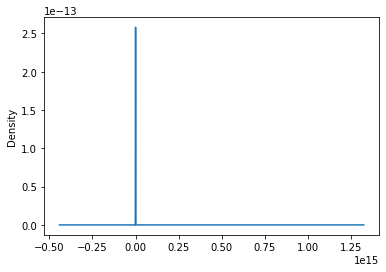

In [10]:
dfExp['MSISDN/Number'].plot(kind='density')
print('This distribution has skew', dfExp['MSISDN/Number'].skew())
print('This distribution has kurtosis', dfExp['MSISDN/Number'].kurt())

## Aggregation per user

##### Number of xDr Session

In [11]:
dfExp.groupby('MSISDN/Number')['Bearer Id'].count().nlargest(10)

MSISDN/Number
3.366371e+10    1067
3.362632e+10      18
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.367588e+10      15
3.376054e+10      15
3.366716e+10      13
3.360313e+10      12
3.360452e+10      12
Name: Bearer Id, dtype: int64

#### Session Duration

In [12]:
dfExp.groupby('MSISDN/Number')['Dur. (ms)'].sum().nlargest(10)

MSISDN/Number
3.366371e+10    72655568.0
3.362578e+10    18553754.0
3.361489e+10     9966898.0
3.376054e+10     9279434.0
3.362632e+10     8791927.0
3.366716e+10     8744914.0
3.366284e+10     6614270.0
3.366469e+10     6288730.0
3.360313e+10     6287761.0
3.366746e+10     5649882.0
Name: Dur. (ms), dtype: float64

#### Total Download

In [13]:
dfExp.groupby('MSISDN/Number')['Total DL (Bytes)', 'Total UL (Bytes)'].sum().nlargest(10, 'Total DL (Bytes)')

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.366371e+10,4.875453e+11,4.437711e+10
3.361489e+10,8.156743e+09,6.894830e+08
3.376054e+10,7.811295e+09,7.034786e+08
3.362578e+10,7.770043e+09,7.295774e+08
3.367588e+10,7.309542e+09,5.815688e+08
3.362632e+10,7.301517e+09,6.696507e+08
3.365973e+10,7.081602e+09,6.242603e+08
3.366646e+10,6.903440e+09,4.050610e+08
3.376041e+10,6.610852e+09,5.215189e+08


#### Total Upload data

In [14]:
dfExp.groupby('MSISDN/Number')['Total DL (Bytes)', 'Total UL (Bytes)'].sum().nlargest(10, 'Total UL (Bytes)')

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.366371e+10,4.875453e+11,4.437711e+10
3.362578e+10,7.770043e+09,7.295774e+08
3.376054e+10,7.811295e+09,7.034786e+08
3.361489e+10,8.156743e+09,6.894830e+08
3.362632e+10,7.301517e+09,6.696507e+08
3.365973e+10,7.081602e+09,6.242603e+08
3.367588e+10,7.309542e+09,5.815688e+08
3.366716e+10,5.052068e+09,5.663264e+08
3.369879e+10,6.010556e+09,5.303431e+08


In [15]:
dfExp["social_media"] = dfExp["Social Media UL (Bytes)"] + dfExp['Social Media DL (Bytes)']
dfExp["google"] = dfExp["Google UL (Bytes)"] + dfExp["Google DL (Bytes)"]
dfExp['email'] = dfExp["Email UL (Bytes)"] + dfExp["Email DL (Bytes)"]
dfExp['youtube'] = dfExp["Youtube UL (Bytes)"] + dfExp["Youtube DL (Bytes)"]
dfExp['netflix'] = dfExp["Netflix UL (Bytes)"] + dfExp["Netflix DL (Bytes)"]
dfExp["gaming"] = dfExp["Gaming UL (Bytes)"] + dfExp["Gaming DL (Bytes)"]
dfExp['other'] = dfExp["Other UL (Bytes)"]+dfExp["Other DL (Bytes)"]
dfExp['total_data'] = dfExp['Total UL (Bytes)'] + dfExp['Total DL (Bytes)']

In [16]:
user = dfExp.groupby('MSISDN/Number')[['social_media', 'google', 'email', 'youtube', 'gaming', 'other', 'total_data']].sum().nlargest(20, 'total_data')


In [17]:
user = dfExp.groupby('MSISDN/Number')[['social_media', 'google', 'email', 'youtube', 'gaming', 'other', 'total_data']].sum().sort_values('total_data', ascending=False)


In [18]:
user['MSISDN/Number'] = user.index

In [19]:
user.head()

,social_media,google,email,youtube,gaming,other,total_data,MSISDN/Number
MSISDN/Number,,,,,,,,
3.366371e+10,1.974199e+09,8.250702e+09,2.403622e+09,2.435073e+10,4.616346e+11,4.516521e+11,5.314666e+11,3.366371e+10
3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,7.749432e+09,7.639264e+09,8.846226e+09,3.361489e+10
3.376054e+10,3.978319e+07,1.232231e+08,3.369377e+07,3.962892e+08,7.461045e+09,4.716134e+09,8.514774e+09,3.376054e+10
3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,7.326673e+09,6.354583e+09,8.499621e+09,3.362578e+10
3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,6.887572e+09,8.167878e+09,7.971167e+09,3.362632e+10


In [20]:
user['MSISDN/Number'] = user.index

In [21]:
user_data.head()

NameError: name 'user_data' is not defined

#### Get the correlation

In [22]:
dfExp.corr()

,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Total UL (Bytes),Total DL (Bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
Unnamed: 0,1.000000,-0.005767,-0.004178,-0.003023,0.164601,-0.003588,0.003878,0.012823,-0.032133,0.004341,...,0.005587,0.000181,-0.002134,-0.001536,0.002660,0.005378,0.001399,0.000208,0.005028,0.000439
Bearer Id,-0.005767,1.000000,0.002804,-0.001562,0.011698,0.000173,-0.003261,0.165532,-0.025230,0.029808,...,-0.004446,0.000576,-0.000961,0.000302,0.002387,-0.002341,-0.002985,0.000612,0.001052,0.000371
Start ms,-0.004178,0.002804,1.000000,0.120945,0.001287,-0.000054,-0.001017,-0.001121,0.003571,-0.002229,...,-0.000028,-0.004299,0.001269,0.002384,0.000810,-0.000299,-0.003486,-0.004277,-0.003611,-0.004297
End ms,-0.003023,-0.001562,0.120945,1.000000,-0.001302,0.000327,-0.001885,-0.000175,-0.004655,-0.002183,...,-0.000574,-0.004687,0.003028,0.000210,-0.002323,-0.005082,0.002206,-0.004667,0.002812,-0.004709
Dur. (ms),0.164601,0.011698,0.001287,-0.001302,1.000000,-0.019757,0.024547,-0.056875,-0.053308,-0.017420,...,-0.001019,0.000768,-0.002739,-0.000017,0.003505,0.004313,-0.005121,0.000727,-0.000383,0.000720
IMSI,-0.003588,0.000173,-0.000054,0.000327,-0.019757,1.000000,-0.468567,-0.000529,-0.000053,-0.000009,...,0.000743,0.005021,0.002669,-0.004097,-0.002043,0.002465,-0.001942,0.005114,0.000781,0.005050
MSISDN/Number,0.003878,-0.003261,-0.001017,-0.001885,0.024547,-0.468567,1.000000,0.005704,-0.000315,-0.000449,...,0.005402,-0.003403,-0.001829,0.001505,0.003319,0.006167,0.002446,-0.003536,-0.001337,-0.003150
IMEI,0.012823,0.165532,-0.001121,-0.000175,-0.056875,-0.000529,0.005704,1.000000,0.005329,0.142666,...,-0.000501,0.001783,0.000066,0.000014,-0.003075,0.000353,-0.004363,0.001916,0.004267,0.001758
Avg RTT DL (ms),-0.032133,-0.025230,0.003571,-0.004655,-0.053308,-0.000053,-0.000315,0.005329,1.000000,0.010535,...,-0.003342,-0.002996,0.000752,0.003165,-0.005097,0.002105,-0.004550,-0.003125,-0.000499,-0.003147
Avg RTT UL (ms),0.004341,0.029808,-0.002229,-0.002183,-0.017420,-0.000009,-0.000449,0.142666,0.010535,1.000000,...,0.001597,0.002019,0.000783,-0.000050,0.000879,-0.000115,0.000024,0.002115,0.000215,0.002091


#### Univariate analysis Non - Graphic

In [23]:
numerical_cols = dfExp.select_dtypes(include=np.number).columns
categorical_cols = list(set(dfExp.columns) - set(numerical_cols))

In [24]:
categorical_cols.remove('Start')
categorical_cols.remove('End')

In [25]:
user_stat_per_app = dfExp.groupby('MSISDN/Number').agg({'social_media': 'sum', 'google': sum, 'email': 'sum', 'youtube': 'sum', 'gaming': 'sum', 'other': 'sum'})



In [26]:
user_stat_per_app.describe()

,social_media,google,email,youtube,gaming,other
count,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,2.566439e+06,1.095963e+07,3.171255e+06,3.178619e+07,6.040877e+08,6.027292e+08
std,6.326171e+06,2.631175e+07,7.672330e+06,7.738362e+07,1.480165e+09,1.451030e+09
min,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,3.063580e+05,1.490450e+05
25%,1.211364e+06,5.942698e+06,1.674481e+06,1.863157e+07,2.880756e+08,2.855599e+08
50%,2.303820e+06,9.586190e+06,2.799824e+06,2.680045e+07,5.423560e+08,5.398323e+08
75%,3.307530e+06,1.321505e+07,3.847206e+06,3.792833e+07,7.773118e+08,7.754190e+08
max,1.974199e+09,8.250702e+09,2.403622e+09,2.435073e+10,4.616346e+11,4.516521e+11


In [27]:
user_stat_per = dfExp.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': sum, 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum', 'total_data': 'sum'})


In [28]:
user_stat_per.describe()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),total_data
count,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,1.403768,1.468459e+05,5.772424e+07,6.382138e+08,6.959337e+08
std,3.358017,2.897108e+05,1.401914e+08,1.560296e+09,1.696350e+09
min,1.000000,7.142000e+03,2.866892e+06,8.827082e+06,3.324901e+07
25%,1.000000,7.130800e+04,3.639547e+07,3.148323e+08,3.585617e+08
50%,1.000000,1.027400e+05,4.679387e+07,5.703738e+08,6.179299e+08
75%,2.000000,1.727990e+05,6.573405e+07,8.073704e+08,8.574377e+08
max,1067.000000,7.265557e+07,4.437711e+10,4.875453e+11,5.314666e+11


In [29]:
dfExp[numerical_cols].describe()

,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Total UL (Bytes),Total DL (Bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
count,150001.000000,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,...,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05
mean,75000.000000,1.012045e+19,499.188199,498.800888,1.046084e+05,2.082016e+14,4.182441e+10,4.842592e+13,97.774455,15.315031,...,4.112121e+07,4.546434e+08,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08,4.957646e+08
std,43301.703202,2.892438e+18,288.610872,288.096693,8.103736e+04,2.144723e+10,2.438731e+12,2.238739e+13,559.909444,76.687998,...,1.127639e+07,2.441421e+08,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08,2.443818e+08
min,0.000000,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,2.866892e+06,7.114041e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,2.895611e+07
25%,37500.000000,7.349883e+18,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,...,3.322201e+07,2.431072e+08,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08,2.844759e+08
50%,75000.000000,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,...,4.114331e+07,4.558411e+08,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08,4.968611e+08
75%,112500.000000,1.304243e+19,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368307e+10,8.611970e+13,62.000000,11.000000,...,4.903424e+07,6.657051e+08,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08,7.065059e+08
max,150000.000000,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,...,7.833131e+07,9.029696e+08,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,9.559848e+08


In [30]:
dfExp['total_data'].describe()


count    1.500000e+05
mean     4.957646e+08
std      2.443818e+08
min      2.895611e+07
25%      2.844759e+08
50%      4.968611e+08
75%      7.065059e+08
max      9.559848e+08
Name: total_data, dtype: float64

#### Univariate Graphical EDA

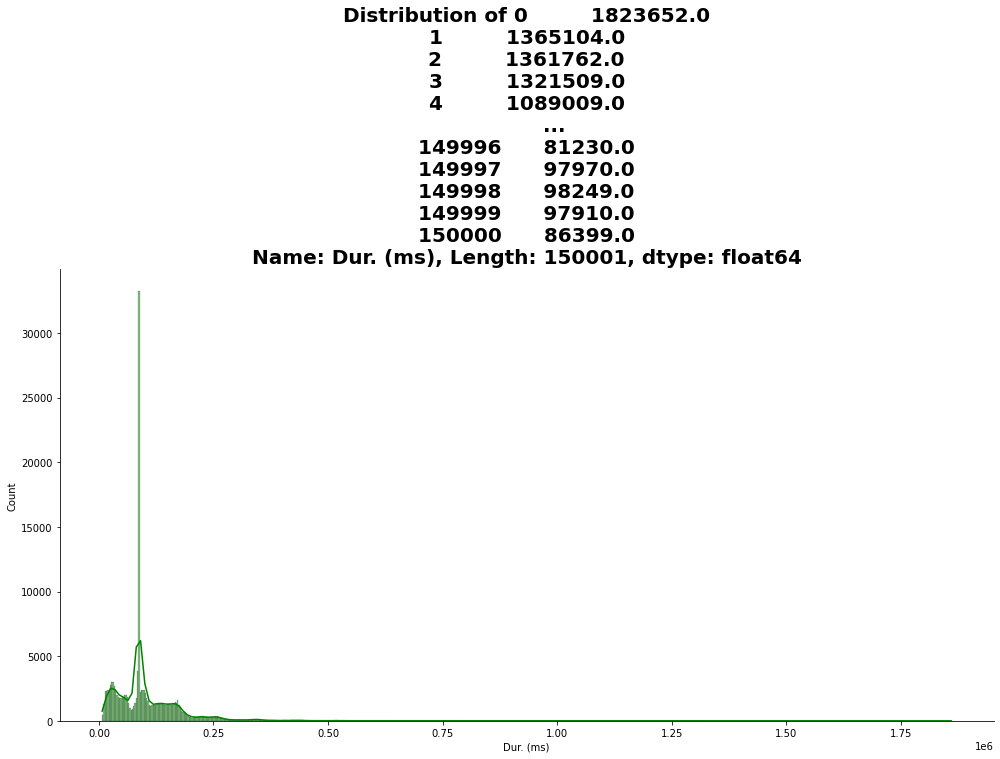

In [31]:
Plot().plot_hist(dfExp, dfExp['Dur. (ms)'], 'Green')

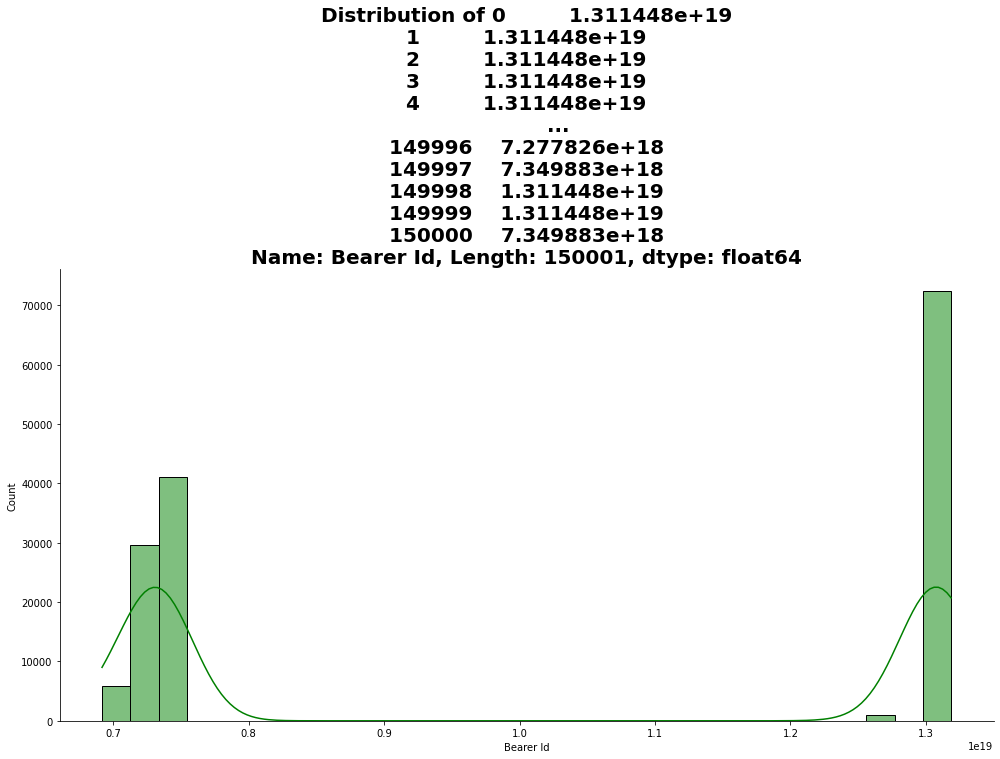

In [32]:
Plot().plot_hist(dfExp, dfExp['Bearer Id'], 'Green')

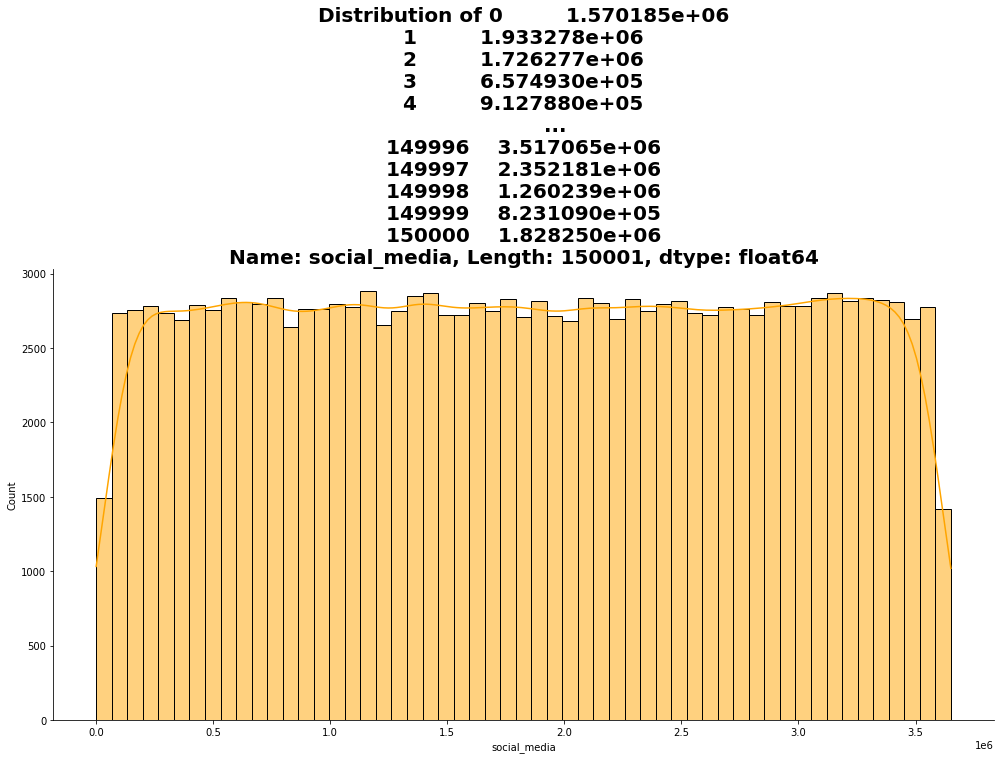

In [33]:
Plot().plot_hist(dfExp, dfExp['social_media'], 'orange')

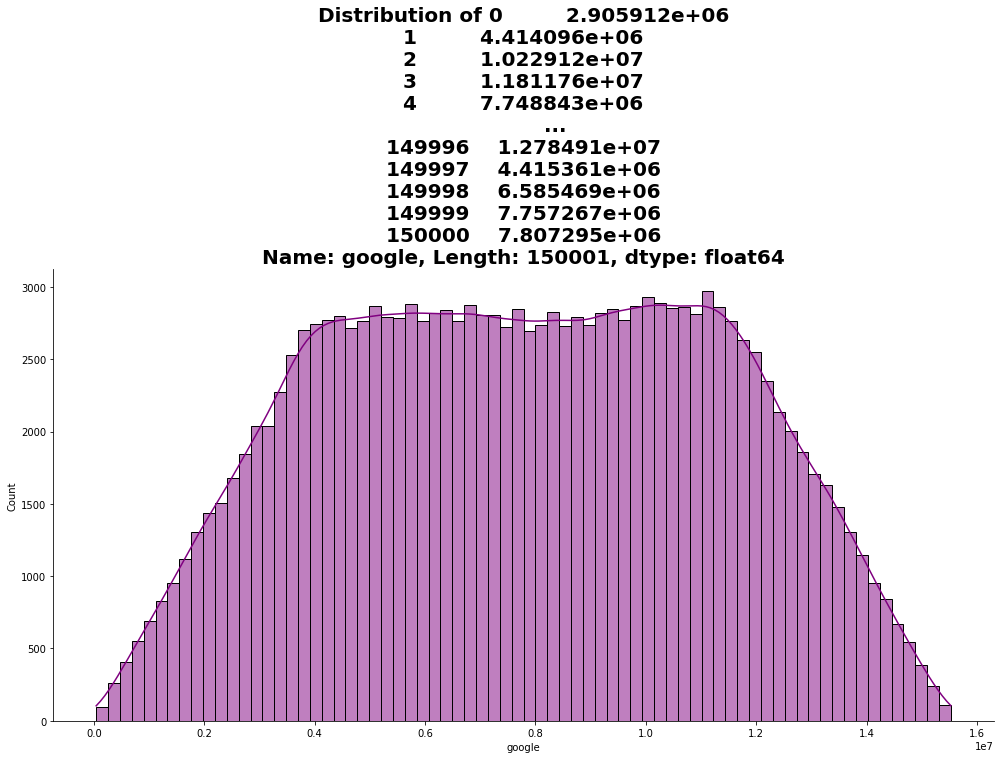

In [34]:
Plot().plot_hist(dfExp, dfExp['google'], 'purple')

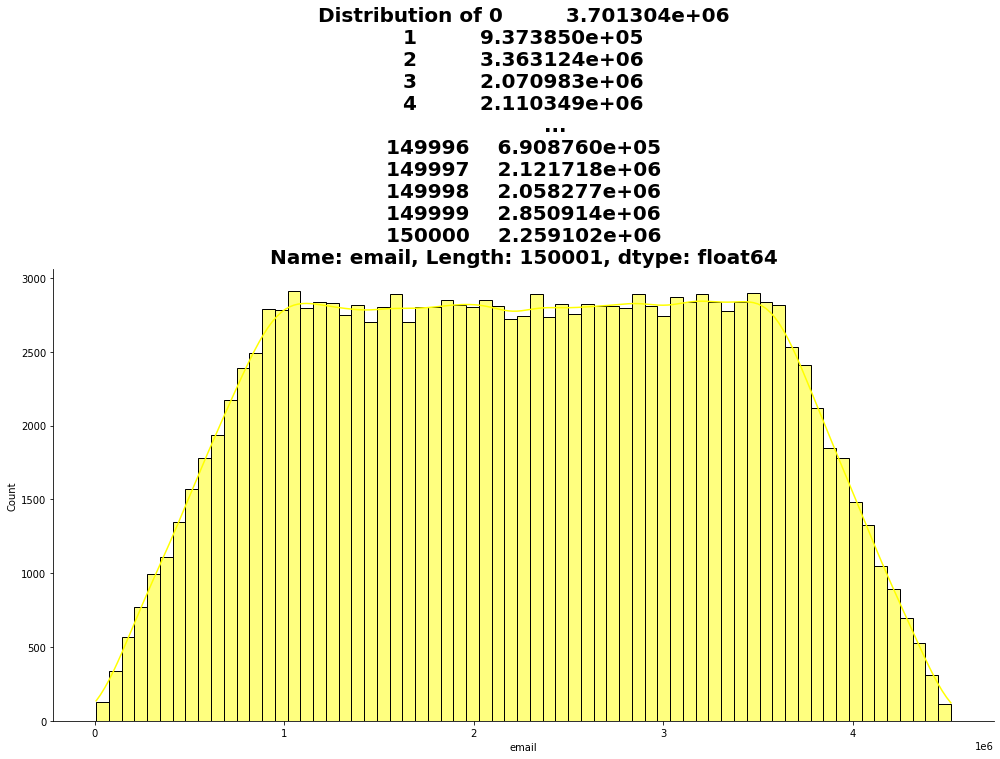

In [35]:
Plot().plot_hist(dfExp, dfExp['email'], 'yellow')

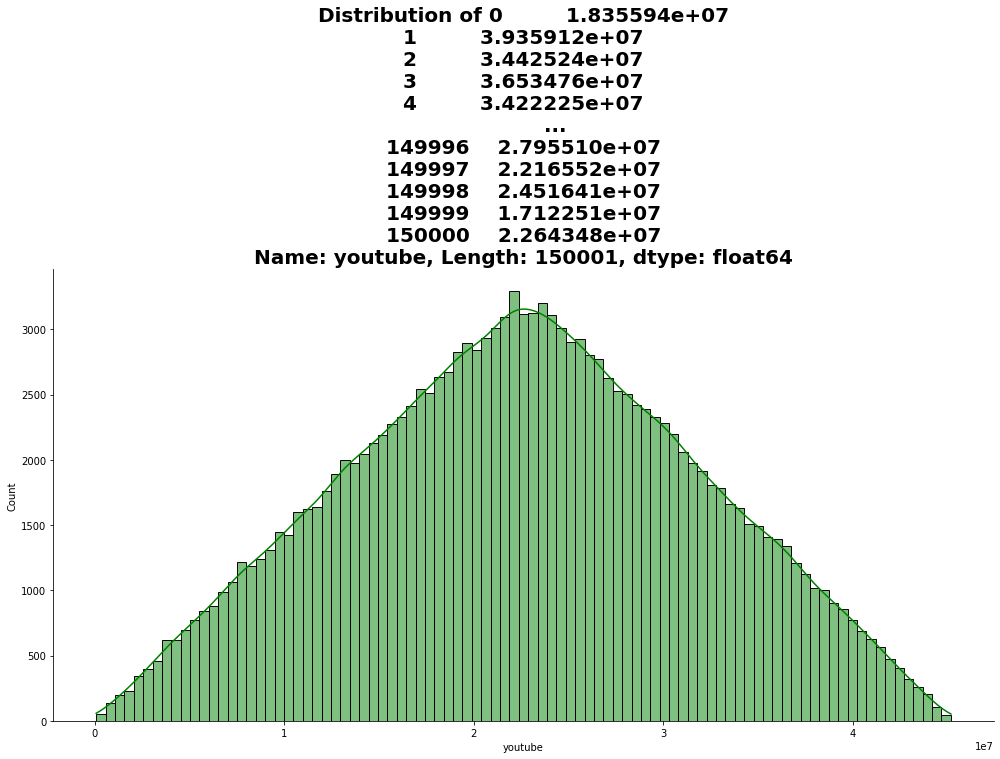

In [36]:
Plot().plot_hist(dfExp, dfExp['youtube'], 'green')

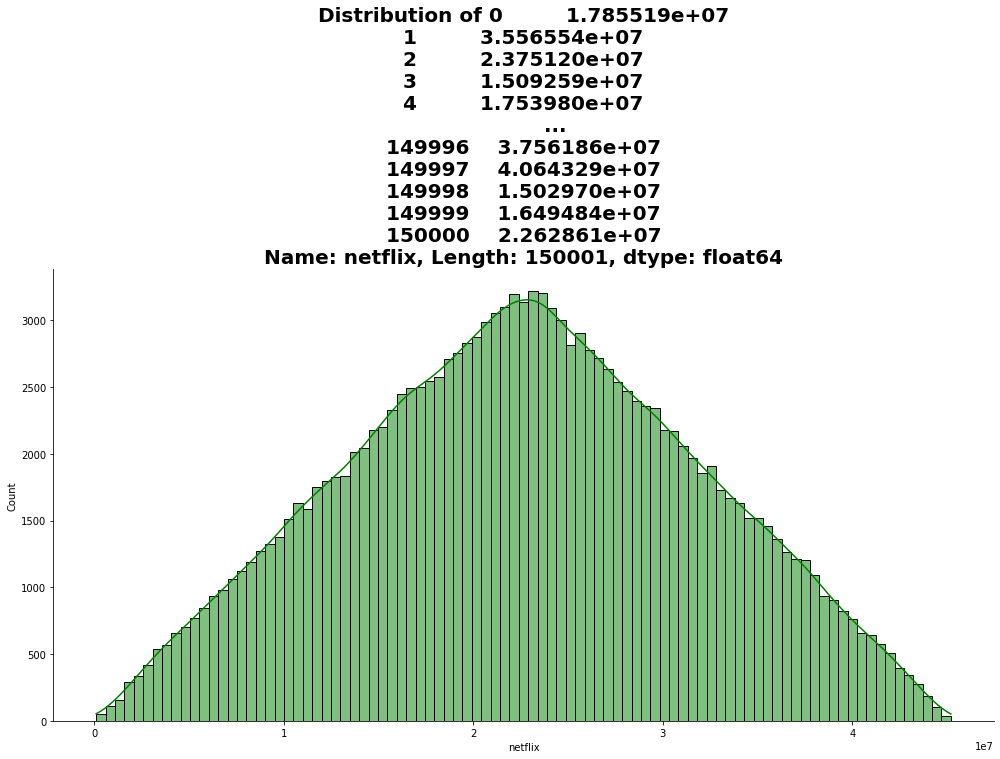

In [37]:
Plot().plot_hist(dfExp, dfExp['netflix'], 'green')

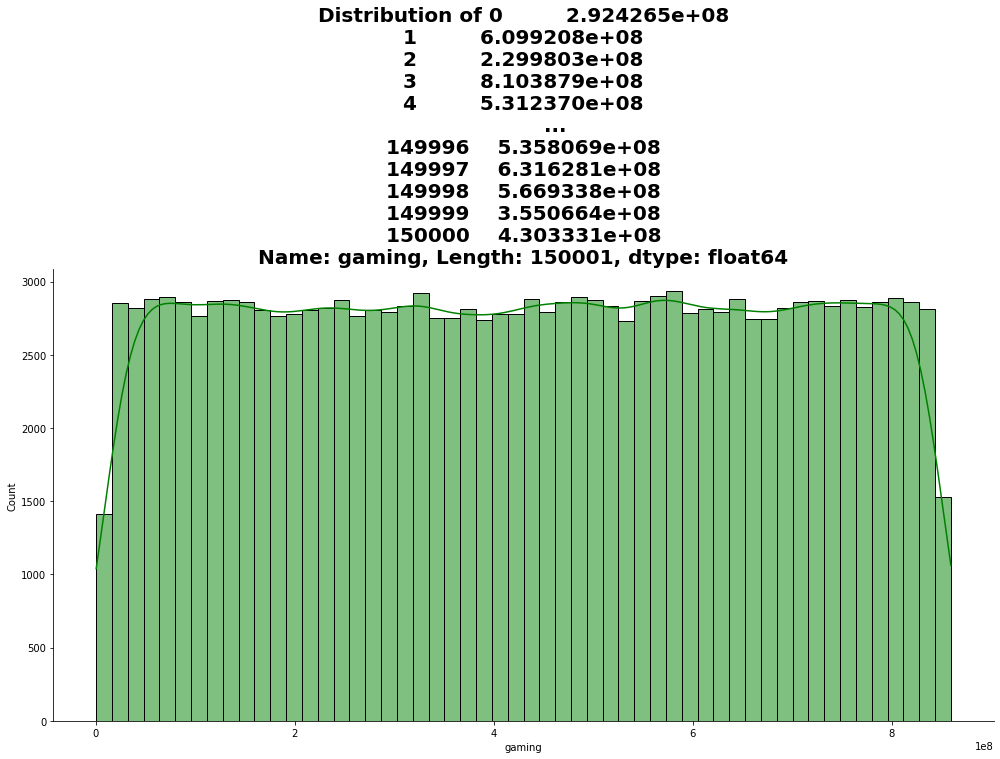

In [38]:
Plot().plot_hist(dfExp, dfExp['gaming'], 'green')

#### Bivariate Analysis

#### Scatter plot

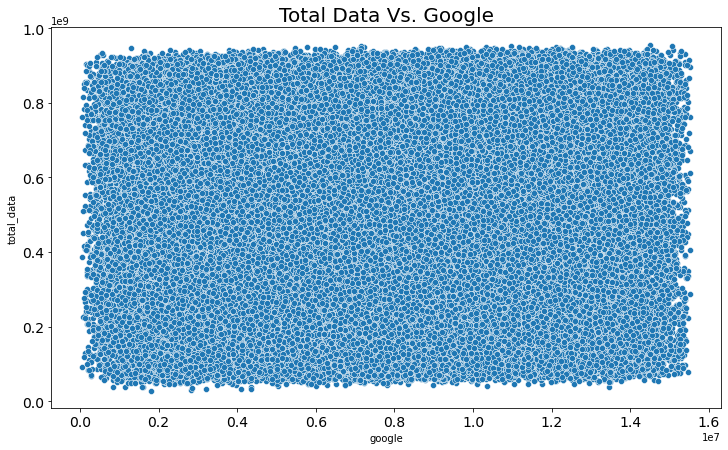

In [39]:
Plot().plot_scatter(dfExp, dfExp['google'], dfExp['total_data'], 'Total Data Vs. Google', None, None)

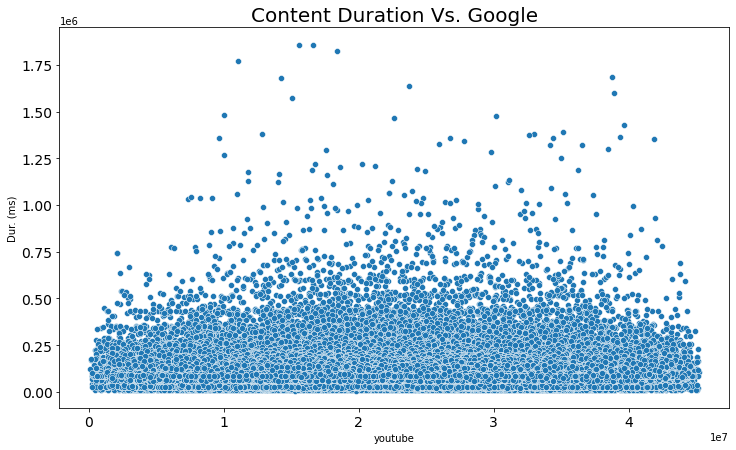

In [40]:
Plot().plot_scatter(dfExp,  dfExp['youtube'], dfExp['Dur. (ms)'], 'Content Duration Vs. Google', None, None)

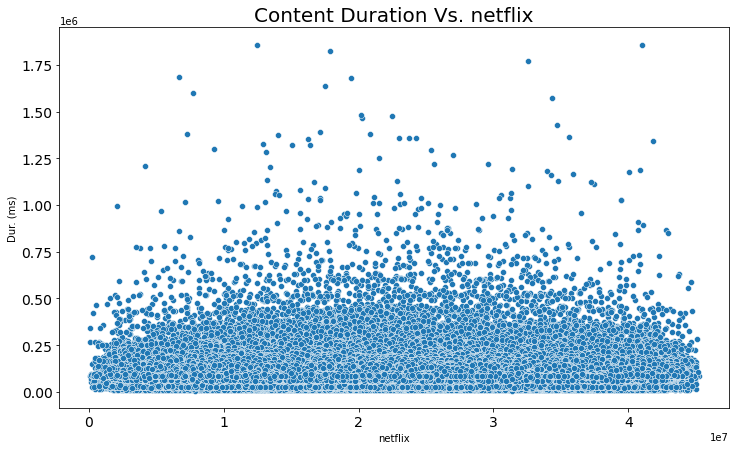

In [41]:
Plot().plot_scatter(dfExp,  dfExp['netflix'], dfExp['Dur. (ms)'], 'Content Duration Vs. netflix', None, None)

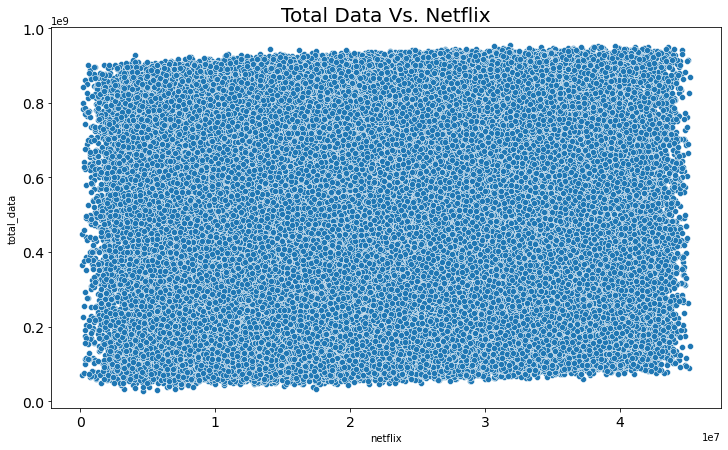

In [42]:
Plot().plot_scatter(dfExp, dfExp['netflix'], dfExp['total_data'], 'Total Data Vs. Netflix', None, None)

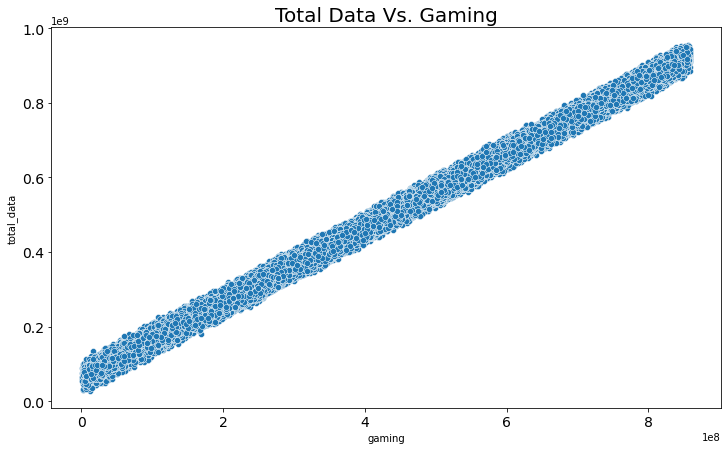

In [43]:
Plot().plot_scatter(dfExp, dfExp['gaming'], dfExp['total_data'], 'Total Data Vs. Gaming', None, None)

In [44]:
preprocess = PreProcess(dfExp)

In [45]:
df = dfExp.copy()


In [46]:
df2 = pd.read_csv('../data/cleaned_data.csv')

In [47]:
data= df2[['MSISDN/Number', 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming',  'other', 'total_data', 'Handset Manufacturer']]

In [48]:
data.head()

,MSISDN/Number,social_media,google,email,youtube,netflix,gaming,other,total_data,Handset Manufacturer
0,3.366496e+10,1.570185e-12,0.000003,3.701304e-06,0.000018,0.000018,292.426453,180.558843,345.629377,Samsung
1,3.368185e+10,1.933278e-12,0.000004,9.373850e-07,0.000039,0.000036,609.920783,541.959383,707.185356,Samsung
2,3.376063e+10,1.726277e-12,0.000010,3.363124e-06,0.000034,0.000024,229.980251,414.908351,307.690973,Samsung
3,3.375034e+10,6.574930e-13,0.000012,2.070983e-06,0.000037,0.000015,810.387875,761.837216,889.352748,undefined
4,3.369980e+10,9.127880e-13,0.000008,2.110349e-06,0.000034,0.000018,531.237049,564.619822,607.681403,Samsung


In [49]:
total_count_app = pd.DataFrame()

In [50]:
google_total = data.sum()[1]
email_total = data.sum()[2]
youtube_total = data.sum()[3]
netflix_total = data.sum()[4]
gaming_total = data.sum()[5]
other_total = data.sum()[6]

In [51]:
total_count_app['app'] = ['google', 'email', 'youtube', 'netflix', 'gaming', 'other']
total_count_app['total'] = [google_total, email_total, youtube_total, netflix_total, gaming_total,  other_total]

In [52]:
total_count_app.head(6)

,app,total
0,google,2.742394e-07
1,email,1.171102e+00
2,youtube,3.388676e-01
3,netflix,3.396545e+00
4,gaming,3.394314e+00
5,other,6.455040e+07


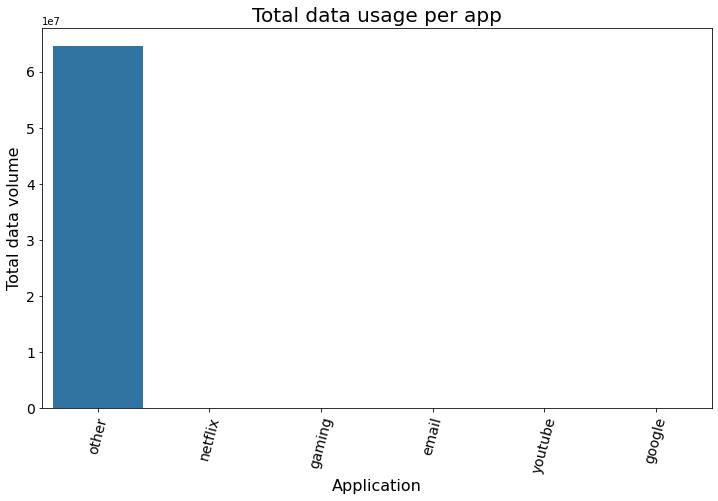

In [53]:
Plot().plot_bar(total_count_app.sort_values(
            by=['total'], ascending=False), 'app', 'total', "Total data usage per app", "Application", "Total data volume")

#### Variable Transformation

In [54]:
var = df[['MSISDN/Number', 'Dur. (ms)', 'total_data']]

In [55]:
var.head()

,MSISDN/Number,Dur. (ms),total_data
0,3.366496e+10,1823652.0,345629377.0
1,3.368185e+10,1365104.0,707185356.0
2,3.376063e+10,1361762.0,307690973.0
3,3.375034e+10,1321509.0,889352748.0
4,3.369980e+10,1089009.0,607681403.0


In [56]:
var_agg = var.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum', 'total_data': 'sum'})

In [57]:
var_agg.shape

(106856, 2)

In [58]:
var_agg_decile = overview.get_decile(var_agg, 'Dur. (ms)', 5, ['First Decile', 'Second Decile', 'Third Decile', 'Fourth Decile', 'Fifth Decile'])

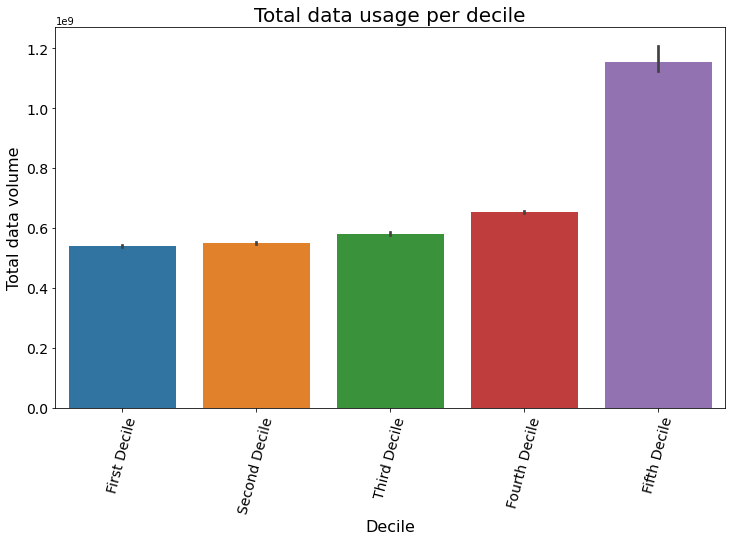

In [59]:
Plot().plot_bar(var_agg_decile.sort_values(
            by=['total_data'], ascending=False), 'deciles', 'total_data' , "Total data usage per decile", "Decile", "Total data volume")



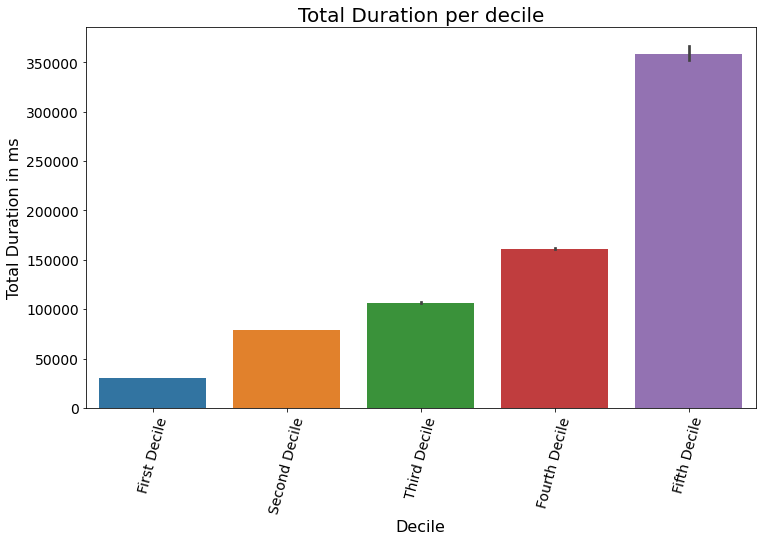

In [60]:
Plot().plot_bar(var_agg_decile.sort_values(
            by=['total_data'], ascending=False), 'deciles', 'Dur. (ms)' , "Total Duration per decile", "Decile", "Total Duration in ms")

### Correlation Analysis

In [61]:
corr_analysis = df2[['MSISDN/Number','social_media', 'google',
                    'email', 'youtube', 'netflix', 'gaming', 'other']]

In [62]:
corr_analysis_agg = corr_analysis.groupby('MSISDN/Number').agg({'social_media':'sum', 'google':'sum', 'email':'sum', 'youtube':'sum', 'netflix':'sum', 'gaming':'sum', 'other':'sum'})

In [63]:
corr_analysis_agg.corr()

,social_media,google,email,youtube,netflix,gaming,other
social_media,1.000000,0.969010,0.967948,0.971362,0.971349,0.962478,0.961870
google,0.969010,1.000000,0.974119,0.977718,0.977487,0.968700,0.968014
email,0.967948,0.974119,1.000000,0.976342,0.976363,0.967152,0.966720
youtube,0.971362,0.977718,0.976342,1.000000,0.980146,0.970956,0.970447
netflix,0.971349,0.977487,0.976363,0.980146,1.000000,0.970908,0.970013
gaming,0.962478,0.968700,0.967152,0.970956,0.970908,1.000000,0.961151
other,0.961870,0.968014,0.966720,0.970447,0.970013,0.961151,1.000000


#### Dimensionality Reduction

In [64]:
# Non-Graphical Univariate analysis for the categorical variables
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = list(set(df.columns) - set(num_cols))

In [65]:
dfExp[num_cols].columns

Index(['Unnamed: 0', 'Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)',
       'social_media', 'google', 'email', 'youtube', 'netflix', 'gaming',
       'other', 'total_data'],
      dtype='object')

In [66]:
num_final = [col for col in num_cols if col not in ['MSISDN/Number','Bearer Id', 'start_ms', 'end_ms', 'imsi', 'imei']]

In [67]:
len(num_final)

41

In [68]:
len(df.columns)

48

In [69]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [70]:
df3 = dfExp.copy()

In [71]:
df3 = clean_dataset(df3[num_final])

In [72]:
df2.shape

(150001, 48)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df3)
df_scaled = scaler.transform(df3)

In [78]:
from sklearn.decomposition import PCA
pca_44 = PCA(n_components=41, random_state=42)
pca_44.fit(df_scaled)

PCA(n_components=41, random_state=42)

In [79]:
x_pca_44 = pca_44.transform(df_scaled)

In [80]:
x_pca_44.shape

(150000, 41)

In [81]:
sum(pca_44.explained_variance_ratio_)

1.0

In [82]:
np.cumsum(pca_44.explained_variance_ratio_ * 100)

array([  9.75403181,  17.50433319,  23.71904326,  28.68050437,
        33.59328274,  38.50103416,  43.37941693,  48.21537701,
        53.03567859,  56.59088817,  59.97933992,  62.71458423,
        65.24432139,  67.71100362,  70.16964649,  72.62407883,
        75.06648916,  77.49984594,  79.93184507,  82.35277503,
        84.76697372,  87.16939246,  89.51838789,  91.80907858,
        93.95136561,  96.04183315,  97.7984158 ,  98.8752603 ,
        99.7843177 , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

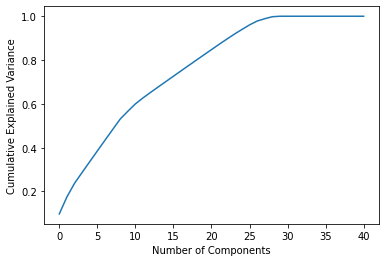

In [83]:
plt.plot(np.cumsum(pca_44.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [84]:
print("Variance explained by first Principal components: {}".format( np.cumsum(pca_44.explained_variance_ratio_ * 100)[0]))
print("Variance explained by  2 Principal components: {}".format( np.cumsum(pca_44.explained_variance_ratio_ * 100)[1]))
print("Variance explained by  3 Principal components: {}".format( np.cumsum(pca_44.explained_variance_ratio_ * 100)[2]))
print("Variance explained by  10 Principal components: {}".format( np.cumsum(pca_44.explained_variance_ratio_ * 100)[9]))

Variance explained by first Principal components: 9.754031809122589
Variance explained by  2 Principal components: 17.504333194436242
Variance explained by  3 Principal components: 23.71904326436531
Variance explained by  10 Principal components: 56.59088817153755


In [85]:
pca_65 = PCA(n_components=0.65, random_state=42)
pca_65.fit(df_scaled)
df_pca_95 = pca_65.transform(df_scaled)

In [86]:
df_pca_95.shape

(150000, 13)